In [62]:
import sys
sys.path.append('..')
from acaps import acaps_data
import pandas as pd
import datetime
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt

In [63]:
list_months = acaps_data.get_list_months(18)

In [64]:
type(list_months[0])
list_months

['Jun2020',
 'Jul2020',
 'Aug2020',
 'Sep2020',
 'Oct2020',
 'Nov2020',
 'Dec2020',
 'Jan2021',
 'Feb2021',
 'Mar2021',
 'Apr2021',
 'May2021',
 'Jun2021',
 'Jul2021',
 'Aug2021',
 'Sep2021',
 'Oct2021',
 'Nov2021']

In [65]:
username = None
password = None

In [66]:
baseline_name = 'api/v1/inform-severity-index/'
df = pd.DataFrame()
for month in list_months:  
    df_tmp = acaps_data.get_df(baseline_name+month, username, password)
    df_tmp['month'] = datetime.datetime.strptime(month, "%b%Y") # month as datetime for easier handling
    df = df.append(df_tmp)

reading from at...
https://api.acaps.org/api/v1/inform-severity-index/Jun2020
reading from at...
https://api.acaps.org/api/v1/inform-severity-index/Jul2020
reading from at...
https://api.acaps.org/api/v1/inform-severity-index/Aug2020
reading from at...
https://api.acaps.org/api/v1/inform-severity-index/Sep2020
reading from at...
https://api.acaps.org/api/v1/inform-severity-index/Oct2020
reading from at...
https://api.acaps.org/api/v1/inform-severity-index/Nov2020
reading from at...
https://api.acaps.org/api/v1/inform-severity-index/Dec2020
reading from at...
https://api.acaps.org/api/v1/inform-severity-index/Jan2021
reading from at...
https://api.acaps.org/api/v1/inform-severity-index/Feb2021
reading from at...
https://api.acaps.org/api/v1/inform-severity-index/Mar2021
reading from at...
https://api.acaps.org/api/v1/inform-severity-index/Apr2021
reading from at...
https://api.acaps.org/api/v1/inform-severity-index/May2021
reading from at...
https://api.acaps.org/api/v1/inform-severity-

In [67]:
df['month']
df.columns

Index(['crisis_id', 'crisis_name', 'type_of_crisis', 'regional_or_country',
       'country_level', 'individual_aggregated', 'website_name', 'iso3',
       'country', 'regions', 'INFORM Severity Index',
       'INFORM Severity category (numeric)', 'INFORM Severity category',
       'Reliability', 'Impact of the crisis', 'Geographical Impact',
       'Human Impact', 'Conditions of affected people', 'People in need',
       'Concentration of conditions', 'Complexity', 'Society and safety',
       'Operating environment', 'Last updated', 'month'],
      dtype='object')

In [68]:
df[['crisis_id','INFORM Severity Index','month']]

crisis_id  INFORM Severity Index      month
0     AFG001                    4.5 2020-06-01
1     BDI001                    3.3 2020-06-01
2     BFA002                    3.9 2020-06-01
3     BGD001                    2.9 2020-06-01
4     BGD002                    3.3 2020-06-01
..       ...                    ...        ...
24    VEN001                    4.2 2021-11-01
25    YEM001                    4.9 2021-11-01
26    YEM002                    4.6 2021-11-01
27    ZMB002                    2.9 2021-11-01
28    ZWE001                    3.5 2021-11-01

[2490 rows x 3 columns]

<AxesSubplot:xlabel='month', ylabel='INFORM Severity Index'>

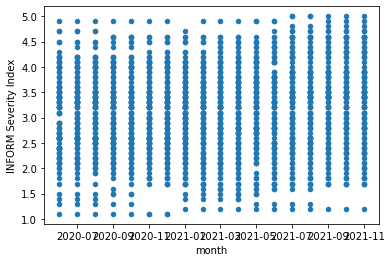

In [69]:
df.plot(kind='scatter', x='month',y='INFORM Severity Index')

In [70]:
# pivot to have df with month as index and crisis as column
df_pivot = df.pivot(index='month', columns='crisis_id')['INFORM Severity Index']
df_pivot.shape
df_pivot_all = df_pivot.copy()

In [71]:
for c in df_pivot.columns:
    if df_pivot[c].max() - df_pivot[c].min() < 1:
        df_pivot.drop(c,inplace=True,axis=1)

In [72]:
# remove columns with no variation 
# this is not enough but it's a starting point
for c in df_pivot.columns:
    if len(df_pivot[c].unique()) == 1:
        df_pivot.drop(c,inplace=True,axis=1)
df_pivot.shape

(18, 5)

<AxesSubplot:xlabel='month'>

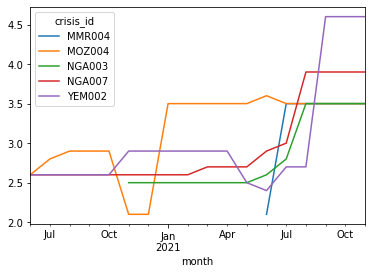

In [73]:
df_pivot.plot()

In [74]:
evolving_crisis = list(df_pivot.columns)

In [75]:
#df[df['crisis_id']=='YEM002']

In [76]:
#df[df['crisis_id']=='MMR004']

In [77]:
#df.to_csv('inform-severity-index.csv')

In [78]:
endpoint_logs = 'api/v1/inform-severity-index/log/'
df_log = acaps_data.get_df(endpoint_logs, username, password)

reading from at...
https://api.acaps.org/api/v1/inform-severity-index/log/


In [79]:
#df_log.to_csv('inform-severity-index_log.csv')

In [80]:
pd.set_option('display.max_rows', 100)
df_log.head(50)

id crisis_id                             crisis      country   iso3  \
0    1    MLI001             Complex crisis in Mali       [Mali]  [MLI]   
1    2    MLI001             Complex crisis in Mali       [Mali]  [MLI]   
2    3    MLI001             Complex crisis in Mali       [Mali]  [MLI]   
3    5    MLI001             Complex crisis in Mali       [Mali]  [MLI]   
4    6    MLI001             Complex crisis in Mali       [Mali]  [MLI]   
5    7    MLI001             Complex crisis in Mali       [Mali]  [MLI]   
6    8    MLI001             Complex crisis in Mali       [Mali]  [MLI]   
7    9    MLI001             Complex crisis in Mali       [Mali]  [MLI]   
8   11    MLI001             Complex crisis in Mali       [Mali]  [MLI]   
9   13    MLI001             Complex crisis in Mali       [Mali]  [MLI]   
10  14    MLI001             Complex crisis in Mali       [Mali]  [MLI]   
11  15    MLI001             Complex crisis in Mali       [Mali]  [MLI]   
12  17    MLI001             Complex crisis in Mali       [Mali]  [MLI]   
13  18    MLI001             Complex crisis in Mali       [Mali]  [MLI]   
14  19    MLI001             Complex crisis in Mali       [Mali]  [MLI]   
15  22    MLI001             Complex crisis in Mali       [Mali]  [MLI]   
16  27    MLI001             Complex crisis in Mali       [Mali]  [MLI]   
17  28    MLI001             Complex crisis in Mali       [Mali]  [MLI]   
18  29    MLI001             Complex crisis in Mali       [Mali]  [MLI]   
19  31    NIC001  Socioeconomic crisis in Nicaragua  [Nicaragua]  [NIC]   
20  32    NIC001  Socioeconomic crisis in Nicaragua  [Nicaragua]  [NIC]   
21  33    NIC001  Socioeconomic crisis in Nicaragua  [Nicaragua]  [NIC]   
22  35    NIC001  Socioeconomic crisis in Nicaragua  [Nicaragua]  [NIC]   
23  36    NIC001  Socioeconomic crisis in Nicaragua  [Nicaragua]  [NIC]   
24  37    NIC001  Socioeconomic crisis in Nicaragua  [Nicaragua]  [NIC]   
25  38    NIC001  Socioeconomic crisis in Nicaragua  [Nicaragua]  [NIC]   
26  39    NIC001  Socioeconomic crisis in Nicaragua  [Nicaragua]  [NIC]   
27  41    NIC001  Socioeconomic crisis in Nicaragua  [Nicaragua]  [NIC]   
28  43    NIC001  Socioeconomic crisis in Nicaragua  [Nicaragua]  [NIC]   
29  44    NIC001  Socioeconomic crisis in Nicaragua  [Nicaragua]  [NIC]   
30  45    NIC001  Socioeconomic crisis in Nicaragua  [Nicaragua]  [NIC]   
31  47    NIC001  Socioeconomic crisis in Nicaragua  [Nicaragua]  [NIC]   
32  48    NIC001  Socioeconomic crisis in Nicaragua  [Nicaragua]  [NIC]   
33  49    NIC001  Socioeconomic crisis in Nicaragua  [Nicaragua]  [NIC]   
34  52    NIC001  Socioeconomic crisis in Nicaragua  [Nicaragua]  [NIC]   
35  57    NIC001  Socioeconomic crisis in Nicaragua  [Nicaragua]  [NIC]   
36  58    NIC001  Socioeconomic crisis in Nicaragua  [Nicaragua]  [NIC]   
37  59    NIC001  Socioeconomic crisis in Nicaragua  [Nicaragua]  [NIC]   
38  61    SEN002                 Drought in Senegal    [Senegal]  [SEN]   
39  62    SEN002                 Drought in Senegal    [Senegal]  [SEN]   
40  63    SEN002                 Drought in Senegal    [Senegal]  [SEN]   
41  64    SEN002                 Drought in Senegal    [Senegal]  [SEN]   
42  65    SEN002                 Drought in Senegal    [Senegal]  [SEN]   
43  66    SEN002                 Drought in Senegal    [Senegal]  [SEN]   
44  67    SEN002                 Drought in Senegal    [Senegal]  [SEN]   
45  68    SEN002                 Drought in Senegal    [Senegal]  [SEN]   
46  69    SEN002                 Drought in Senegal    [Senegal]  [SEN]   
47  70    SEN002                 Drought in Senegal    [Senegal]  [SEN]   
48  71    SEN002                 Drought in Senegal    [Senegal]  [SEN]   
49  72    SEN002                 Drought in Senegal    [Senegal]  [SEN]   

                                     indicator      figure  \
0                            Buildings damaged         NaN   
1                          Buildings destroyed        

In [81]:
#df_log[(df_log['crisis_id']=='YEM002') & (df_log['indicator']=='Total population')].head(100)

In [82]:
array_indicators = df_log['indicator'].unique()
array_indicators = array_indicators[array_indicators != None] # chiara: there's one None, check why
# chiara: make sure None in python and in array is the same
indicators = sorted(list(array_indicators))
indicators

['Buildings damaged',
 'Buildings destroyed',
 'Buildings in affected area',
 'Crisis affected groups',
 'Economic Losses',
 'Extreme humanitarian conditions - Level 5',
 'Fatalities in all crises',
 'Fatalities reported',
 'Illness cases reported',
 'Injuries reported',
 'Landmass affected',
 'Minimal humanitarian conditions - Level 1',
 'Moderate humanitarian conditions - Level 3',
 'People affected',
 'People displaced',
 'People exposed',
 'People in Need',
 'Severe humanitarian conditions - Level 4',
 'Stressed humanitarian conditions - Level 2',
 'Total population']

In [83]:
# 'figure' is the value of the indicator
#df_log[(df_log['indicator']=='Fatalities reported')&(df_log['crisis_id']=='YEM002')].sort_values('date_of_entry',ascending=False)

2020-05-06 21:45:58.549992
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2020-05-06 21:45:58.596877
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2020-05-06 21:45:58.646712
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2020-05-06 21:45:58.687937
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2020-05-06 21:45:58.732219
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2020-05-06 21:45:58.876638
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2020-05-06 21:45:58.914079
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2020-05-06 21:45:58.952073
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2020-05-06 21:45:58.983754
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2020-05-06 21:45:59.015775
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2020-05-06 21:45:59.048394
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2020-05-06 21:45:59.078998
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2020-05-06 21:45:59.111089
<class 'pandas._libs.tslibs.timestamp

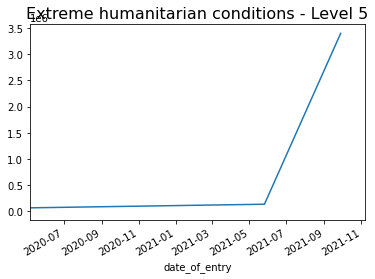

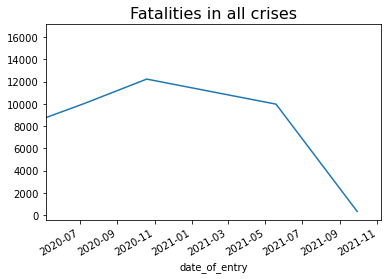

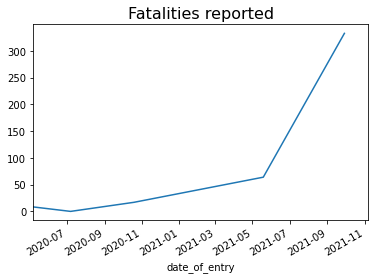

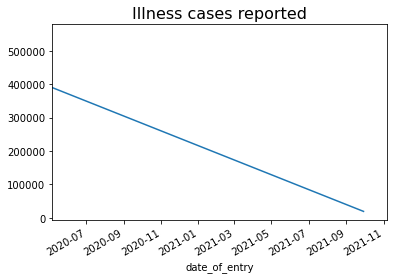

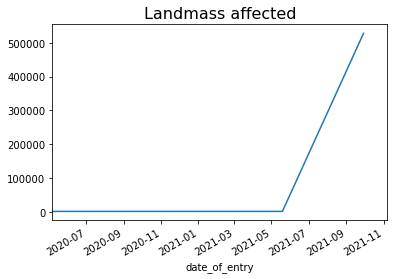

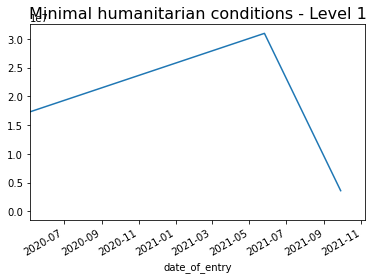

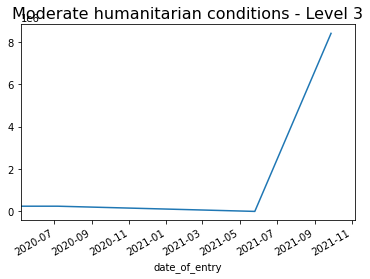

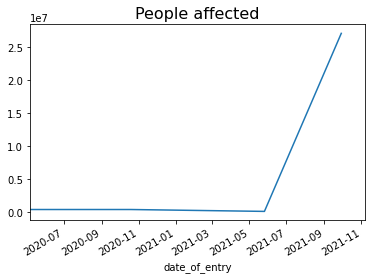

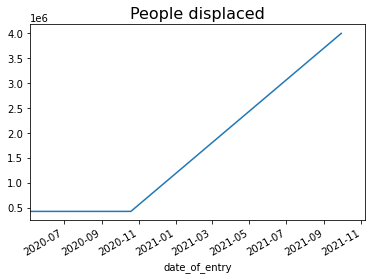

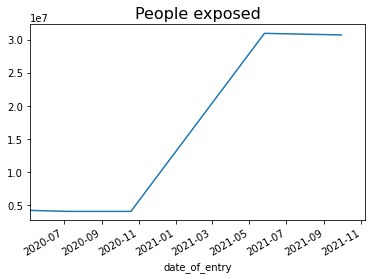

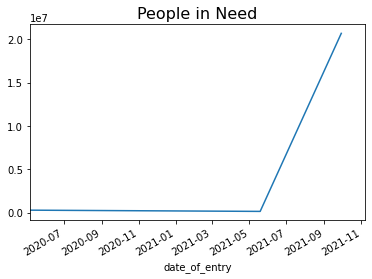

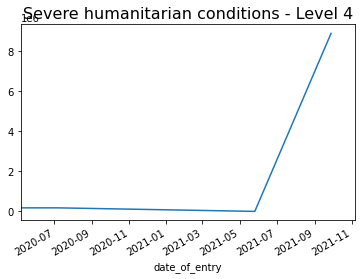

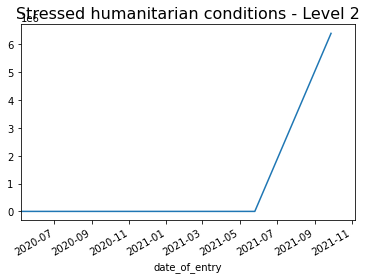

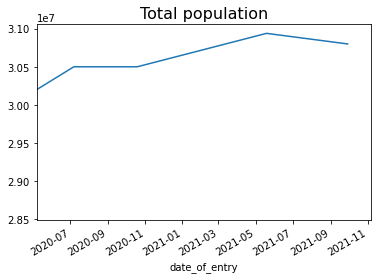

In [84]:
# in this case the time stamp is not the same for all the indicators, so a dict of time series works better than a dataframe
ts_log_dict = {}
for cr_id in evolving_crisis:
    ts_log_dict[cr_id] = {}    
    for ind in indicators: 
        ts_log_dict[cr_id][ind] = df_log[(df_log['crisis_id']==cr_id) & (df_log['indicator']==ind)][['figure','date_of_entry']]        
        ts_log_dict[cr_id][ind].set_index('date_of_entry', inplace=True)
        ts_log_dict[cr_id][ind].index = pd.to_datetime(ts_log_dict[cr_id][ind].index)
        ts_log_dict[cr_id][ind] = ts_log_dict[cr_id][ind]['figure'].dropna()
        if cr_id == 'YEM002':
            # I want to study the evolution so look at entries with at least two data points
            if ts_log_dict[cr_id][ind].size>1:
                #print(cr_id, ind)
                #print(ts_log_dict[cr_id][ind],'\n')
                #print('dropna()')
                #print(ts_log_dict[cr_id][ind].dropna(),'\n\n\n')
                plt.figure()
                ts_log_dict[cr_id][ind].plot()
                plt.title(ind, fontsize=16)
                print(datetime.datetime.today() - relativedelta(months=18))
                plt.xlim([datetime.datetime.today() - relativedelta(months=18), datetime.datetime.today()])
                test = list(ts_log_dict[cr_id][ind].index)[0]
                print(type(test))
            
            
            
            

### Humanitarian Access 

In [85]:
baseline_name_access = 'api/v1/humanitarian-access/'
df_access = pd.DataFrame()
for month in list_months:  
    df_tmp = acaps_data.get_df(baseline_name_access+month, username, password)
    df_tmp['month'] = datetime.datetime.strptime(month, "%b%Y") # month as datetime for easier handling
    df_access = df_access.append(df_tmp)

reading from at...
https://api.acaps.org/api/v1/humanitarian-access/Jun2020
reading from at...
https://api.acaps.org/api/v1/humanitarian-access/Jul2020
reading from at...
https://api.acaps.org/api/v1/humanitarian-access/Aug2020
reading from at...
https://api.acaps.org/api/v1/humanitarian-access/Sep2020
reading from at...
https://api.acaps.org/api/v1/humanitarian-access/Oct2020
reading from at...
https://api.acaps.org/api/v1/humanitarian-access/Nov2020
reading from at...
https://api.acaps.org/api/v1/humanitarian-access/Dec2020
reading from at...
https://api.acaps.org/api/v1/humanitarian-access/Jan2021
reading from at...
https://api.acaps.org/api/v1/humanitarian-access/Feb2021
reading from at...
https://api.acaps.org/api/v1/humanitarian-access/Mar2021
reading from at...
https://api.acaps.org/api/v1/humanitarian-access/Apr2021
reading from at...
https://api.acaps.org/api/v1/humanitarian-access/May2021
reading from at...
https://api.acaps.org/api/v1/humanitarian-access/Jun2021
reading from

In [86]:
#df_access.to_csv('humanitarian-access.csv')

In [87]:
df_access.columns

Index(['crisis_id', 'I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'I7', 'I8', 'I9', 'P1',
       'P2', 'P3', 'ACCESS', 'Infogap', 'month'],
      dtype='object')

In [88]:
df_crisis = pd.merge(df[['crisis_id','INFORM Severity Index','month']], df_access[['crisis_id','ACCESS','month']], on=['crisis_id','month'])

<AxesSubplot:xlabel='INFORM Severity Index', ylabel='ACCESS'>

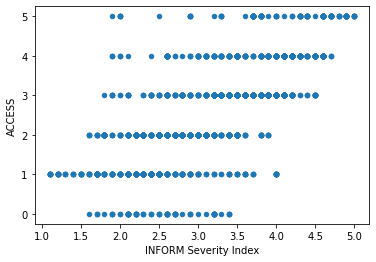

In [89]:
df_crisis.plot.scatter(x='INFORM Severity Index',y='ACCESS')

In [90]:
df_crisis.corr().loc['INFORM Severity Index','ACCESS']

0.6967926988825923

In [30]:
# chiarahttp://localhost:8888/notebooks/03-answer-questions.ipynb#: to be understood: why is the correlation maximum when considering the whole dataset? 
df_crisis[(df_crisis['INFORM Severity Index']>4) | (df_crisis['INFORM Severity Index']<2.5) ].corr()

INFORM Severity Index    ACCESS
INFORM Severity Index               1.000000  0.854664
ACCESS                              0.854664  1.000000

### 

In [53]:
df_new = df[df['month']=='2021-11-01']
df_new['one_iso3'] = df_new['iso3'].apply(lambda x: x[0])

/var/folders/2c/j8lp8l710hj549b6675ldph40000gn/T/ipykernel_88639/772198781.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [39]:
import plotly.express as px

In [55]:
df_new.head()

crisis_id                              crisis_name  type_of_crisis  \
0    AFG001            Complex crisis in Afghanistan  Complex crisis   
1    ARM002     Nagorno-Karabakh Conflict in Armenia        Conflict   
2    AZE002  Nagorno-Karabakh conflict in Azerbaijan        Conflict   
3    BDI001                       Complex in Burundi  Complex crisis   
4    BFA002                 Conflict in Burkina Faso        Conflict   

  regional_or_country country_level individual_aggregated  \
0             Country           Yes            Individual   
1             Country           Yes            Individual   
2             Country           Yes            Individual   
3             Country           Yes            Individual   
4             Country           Yes            Individual   

                              website_name   iso3         country  \
0                           Complex crisis  [AFG]   [Afghanistan]   
1     Nagorno-Karabakh Conflict in Armenia  [ARM]       [Armenia]   
2  Nagorno-Karabakh conflict in Azerbaijan  [AZE]    [Azerbaijan]   
3                          Complex crisis   [BDI]       [Burundi]   
4                                 Conflict  [BFA]  [Burkina Faso]   

         regions  ...  Conditions of affected people  People in need  \
0         [Asia]  ...                            4.5             5.0   
1  [Middle east]  ...                            1.2             1.4   
2  [Middle east]  ...                            NaN             NaN   
3       [Africa]  ...                            4.0             4.0   
4       [Africa]  ...                            4.3             3.6   

  Concentration of conditions Complexity  Society and safety  \
0                         4.0        4.9                 4.8   
1                         1.0        1.9                 2.2   
2                         NaN        3.3                 4.0   
3                         4.0        3.6                 3.6   
4                         5.0        3.7                 3.9   

   Operating environment  Last updated      month   one_country  one_iso3  
0                    5.0    2021-09-15 2021-11-01   Afghanistan       AFG  
1                    1.5    2021-08-05 2021-11-01       Armenia       ARM  
2                    2.5    2021-06-02 2021-11-01    Azerbaijan       AZE  
3                    3.5    2021-06-09 2021-11-01       Burundi       BDI  
4                    3.5    2021-06-30 2021-11-01  Burkina Faso       BFA  

[5 rows x 27 columns]

In [61]:
df_new.columns

Index(['crisis_id', 'crisis_name', 'type_of_crisis', 'regional_or_country',
       'country_level', 'individual_aggregated', 'website_name', 'iso3',
       'country', 'regions', 'INFORM Severity Index',
       'INFORM Severity category (numeric)', 'INFORM Severity category',
       'Reliability', 'Impact of the crisis', 'Geographical Impact',
       'Human Impact', 'Conditions of affected people', 'People in need',
       'Concentration of conditions', 'Complexity', 'Society and safety',
       'Operating environment', 'Last updated', 'month', 'one_country',
       'one_iso3'],
      dtype='object')

In [59]:
fig = px.scatter_geo(df_new, locations="one_iso3", color="Complexity",
                     hover_name="crisis_name", size="Complexity",
                     projection="natural earth")
fig.show()